In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Загрузка данных

In [2]:
data = pd.read_csv("car.csv")
data = data.dropna()
reg_data = data.select_dtypes(include=['number'])
reg_data.corr().Length.to_frame().style.background_gradient(cmap='coolwarm')

x = np.array(reg_data[['Fuel Tank Capacity']])
y = np.array(reg_data["Length"])

# Реализация модели линейной регрессии

In [3]:
class LineR:
    def __init__(self):
        self.a = 0
        self.b = 0
        
        
    def fit(self, x, y, learning_rate, epochs):
        
        for epoch in range(epochs):
            y_pred = self.a * x[:, 0] + self.b
        
            # Частная производная функции MSE для a и b
            grad_a = -2/len(x) * np.sum((y - y_pred) * x[:, 0])
            grad_b = -2/len(x) * np.sum(y - y_pred)

            # Смена коэффициэнтов a и b
            self.a = self.a - learning_rate * grad_a
            self.b = self.b - learning_rate * grad_b
      
    def get_a(self):
        return self.a
    
    def get_b(self):
        return self.b

# Тестирование модели

In [4]:
from sklearn.linear_model import LinearRegression


# Реализованая модель
lineR = LineR()
lineR.fit(x, y, 0.00032, 100000)

# модель от sklearn
model = LinearRegression()
model.fit(x, y)

LinearRegression()

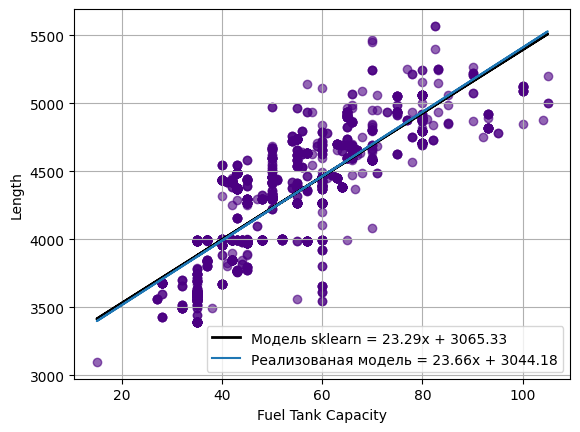

+------------------+--------------------+--------------------+
|    Parameter     |       LineR        |      Sklearn       |
+------------------+--------------------+--------------------+
|    a (наклон)    | 23.66438467753484  | 23.29076443237723  |
|    b (сдвиг)     | 3044.176961709169  | 3065.3309814516524 |
| MSE (отклонение) | 65497.996445049605 | 65463.19646608894  |
+------------------+--------------------+--------------------+


In [5]:
plt.scatter(x, y, color='indigo', alpha = 0.6)

model_a = model.coef_[0]
model_b = model.intercept_
model_pred = model_a * x + model_b
plt.plot(x, model_pred, linewidth=2, color = 'black', label=f'Модель sklearn = {model_a:.2f}x + {model_b:.2f}')


lineR_a = lineR.get_a()
lineR_b = lineR.get_b()
lineR_pred = lineR_a * x[:, 0] + lineR_b
plt.plot(x, lineR_pred, label=f'Реализованая модель = {lineR_a:.2f}x + {lineR_b:.2f}' )


plt.xlabel("Fuel Tank Capacity")
plt.ylabel("Length")
plt.legend()
plt.grid()
plt.show()


model_pred = model_pred.ravel() # Нормализация размерности
lineR_mse = np.sum((y-lineR_pred)**2) / len(lineR_pred)
model_mse = np.sum((y-model_pred)**2) / len(model_pred)

data = [["a (наклон)", lineR_a, model_a], ["b (сдвиг)", lineR_b, model_b], ["MSE (отклонение)", lineR_mse, model_mse]]
table = tabulate(data, headers=["Parameter", "LineR", "Sklearn"], tablefmt="pretty")
print(table)